In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, clear_output
from time import sleep
from livelossplot import PlotLosses
import tensorflow as tf
import numpy as np
import seaborn as sns; 
import imageio
import glob
import tensorflow_probability as tfp
tfd = tfp.distributions
from scipy.stats import norm, uniform
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
slim = tf.contrib.slim
from tqdm.notebook import tqdm
import sys
sys.path.append('../models/')
sys.path.append('../')
from kl_utils import *

print(tf.__version__)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

1.15.0







Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.





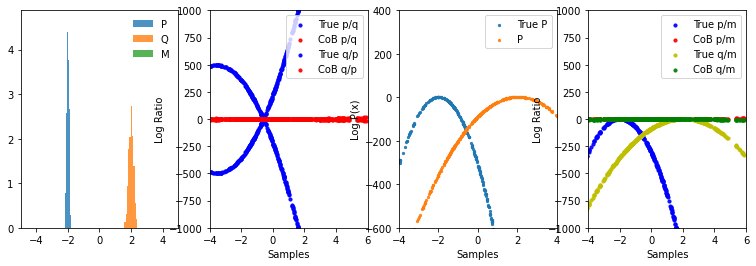

KL :  355.8264
KL from samples :  356.63174
KL from CoB:  0.6321626
Taking 500 samples from prior distributions on weights



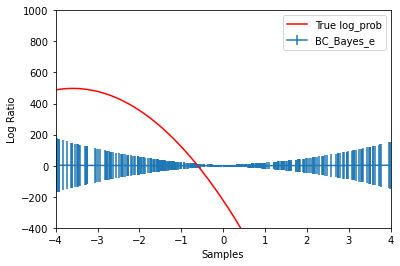

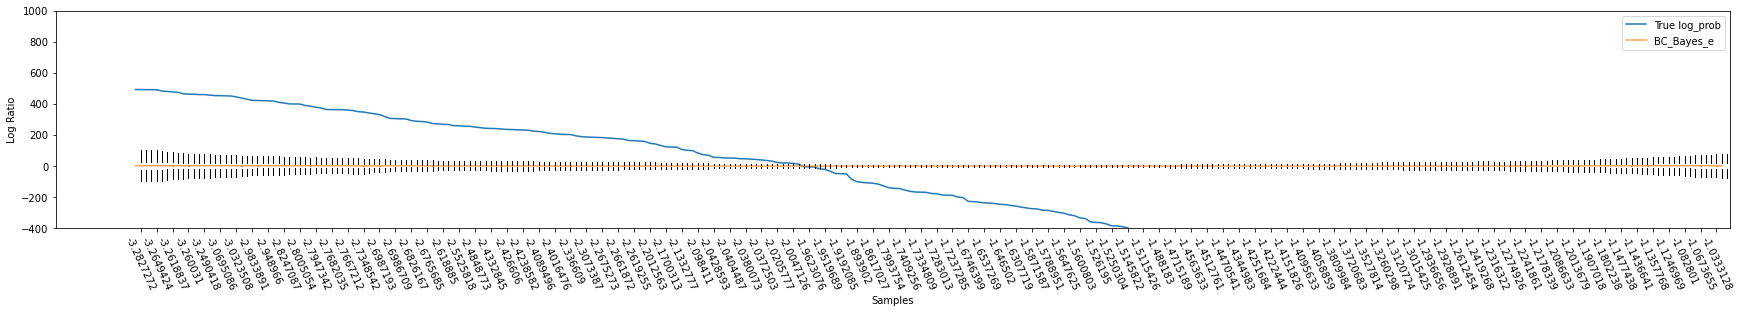

(500, 500)


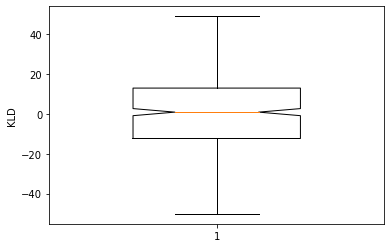

In [2]:
reset()

mu_1=-2.
mu_2=2.
mu_3=0.
scale_p=0.08
scale_q=0.15
scale_m=2.
N=100000

p, q, m, p_samples, q_samples, m_samples = get_data(mu_1,mu_2,mu_3,scale_p,scale_q,scale_m)
dloss = get_loss(p_samples, q_samples, m_samples)
optim = get_optim(dloss, lr=0.001)

log_ratio_p_q, _, kld = get_gt_ratio_kl(p,q,m_samples)
_, kl_from_pq, _ = get_gt_ratio_kl(p,q,p_samples)
kl_from_cob = get_kl_from_cob(p_samples)

log_ratio_p_m = get_logits(m_samples)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

%matplotlib inline
sample_and_plot(sess, kl_from_pq, kl_from_cob, kld, p_samples, q_samples, m_samples, log_ratio_p_q, log_ratio_p_m, mu_1, mu_2, scale_p, scale_q, mu_3, scale_m, training=False)

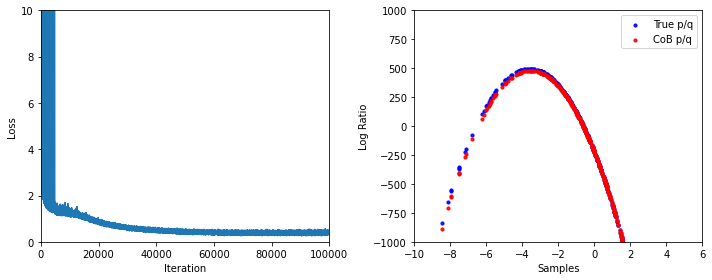

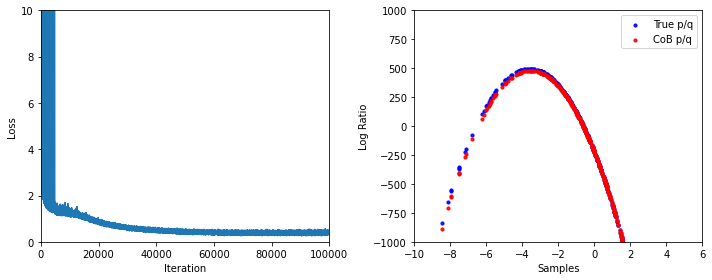

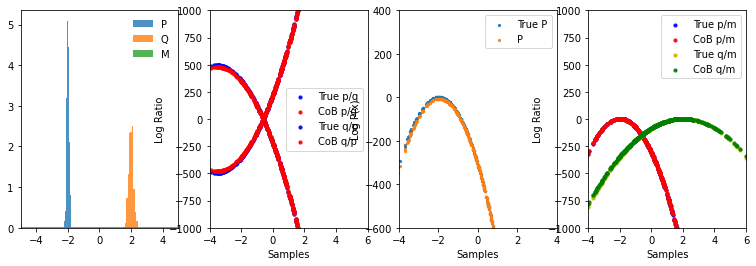

KL :  355.8264
KL from samples :  355.70505
KL from CoB:  346.4948
Taking 500 samples from posterior distributions on weights



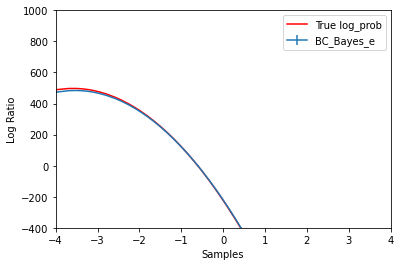

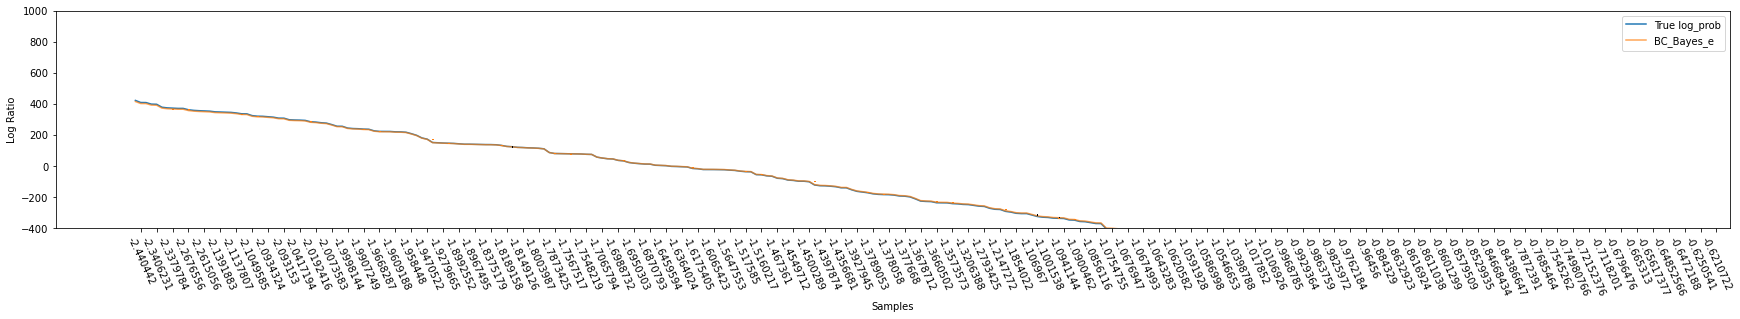

(500, 500)


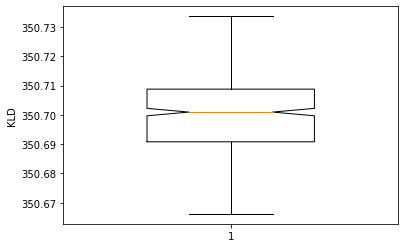

In [3]:
# plotlosses = PlotLosses()
# train(sess, dloss, optim, plotlosses, N=N)


loss_store=[]
fig, [ax1,ax2] = plt.subplots(1, 2,figsize=(10,4))

line, = ax1.plot([0,1],[0,1])
x, y = np.random.random((2, 500))
scat1 = ax2.scatter(x,y,label='True p/q',alpha=0.9,s=10.,c='b')
scat2 = ax2.scatter(x,y,label='CoB p/q',alpha=0.9,s=10.,c='r')

ax1.set_xlabel("Iteration")
ax1.set_ylabel("Loss")
ax1.set_xlim([0,N])
ax1.set_ylim([0,10])

ax2.set_xlabel("Samples")
ax2.set_ylabel("Log Ratio")
ax2.legend(loc='best')
ax2.set_xlim([-10,6])
ax2.set_ylim([-1000,1000])

plt.tight_layout()

pbar = range(0,N)
for i in pbar:

    feed_dict = {}
    l,_ = sess.run([dloss, optim],feed_dict=feed_dict)
    loss_store.append(l)
    if i%500==0:
        line.set_data(range(len(loss_store)), loss_store)
        xs, lpq, lpqm = sess.run([m_samples, log_ratio_p_q, log_ratio_p_m],feed_dict={})
        scat1.set_offsets(np.asarray([xs, lpq]).T)
        scat2.set_offsets(np.asarray([xs,lpqm[:,0]-lpqm[:,1]]).T)
        
        
        
        clear_output(wait=True)
        display(fig)
        
sample_and_plot(sess, kl_from_pq, kl_from_cob, kld, p_samples, q_samples, m_samples, log_ratio_p_q, log_ratio_p_m, mu_1, mu_2, scale_p, scale_q, mu_3, scale_m)
# with open("../models/kl_utils.py", "a") as f:
#     f.write(" ")
#     f.close()

In [4]:
with open("../models/kl_utils.py", "a") as f:
    f.write(" ")
    f.close()
    